In [1]:
import pandas as pd
df = pd.read_csv('premier-league-data.csv')
df.head()

,home_team,away_team,home_goals,away_goals,result,season
0,Sheffield United,Liverpool,1,1,D,2006-2007
1,Arsenal,Aston Villa,1,1,D,2006-2007
2,Everton,Watford,2,1,H,?
3,Newcastle United,Wigan Athletic,2,1,H,2006-2007
4,Portsmouth,Blackburn Rovers,3,0,H,2006-2007


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4560 entries, 0 to 4559
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   home_team   4560 non-null   object
 1   away_team   4560 non-null   object
 2   home_goals  4560 non-null   int64 
 3   away_goals  4560 non-null   int64 
 4   result      4560 non-null   object
 5   season      4560 non-null   object
dtypes: int64(2), object(4)
memory usage: 213.9+ KB


### Data Cleaning

##### Remove invalid values from the season column

In [3]:
df['season'].unique()

array(['2006-2007', '?', '2007-2008', '2008-2009', '2009-2010',
       '2010-2011', '2011-2012', '2012-2013', '2013-2014', '2014-2015',
       '2015-2016', '2016-2017', '2017-2018'], dtype=object)

In [4]:
df['season']=df['season'].str.replace('?','Unknown season')

In [5]:
df.head()

,home_team,away_team,home_goals,away_goals,result,season
0,Sheffield United,Liverpool,1,1,D,2006-2007
1,Arsenal,Aston Villa,1,1,D,2006-2007
2,Everton,Watford,2,1,H,Unknown season
3,Newcastle United,Wigan Athletic,2,1,H,2006-2007
4,Portsmouth,Blackburn Rovers,3,0,H,2006-2007


##### Identify invalid values in goals scored

<Axes: >

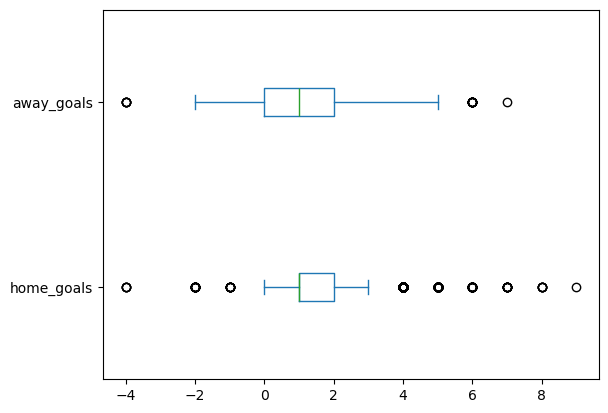

In [6]:
df[['home_goals', 'away_goals']].plot(kind='box', vert=False)

In [7]:
df.loc[df['home_goals']<0, 'home_goals'].count()

34

In [8]:
df.loc[df['away_goals']<0, 'away_goals'].count()

39

##### Replace invalid goals for 0

In [9]:
df.loc[(df['home_goals']<0) | (df['away_goals']<0), ['home_goals','away_goals']]=0

##### Identify and clean invalid results in the result column

In [10]:
df['result'].value_counts()

result
H    2088
A    1278
D    1151
?      43
Name: count, dtype: int64

In [11]:
df.loc[df['home_goals'] > df['away_goals'], 'result']= 'H'

In [12]:
df.loc[df['home_goals'] < df['away_goals'], 'result']= 'A'

In [13]:
df.loc[df['home_goals'] == df['away_goals'], 'result']= 'D'

In [14]:
df['result'].value_counts()

result
H    2075
A    1269
D    1216
Name: count, dtype: int64

### ANALYSIS

##### What's the average number of goals per match?

In [15]:
(df['home_goals'] + df['away_goals']).mean()

2.6414473684210527

##### Create a new column total_goals

In [16]:
df['total_goals']=df['home_goals'] + df['away_goals']

In [17]:
df.head()

,home_team,away_team,home_goals,away_goals,result,season,total_goals
0,Sheffield United,Liverpool,1,1,D,2006-2007,2
1,Arsenal,Aston Villa,1,1,D,2006-2007,2
2,Everton,Watford,2,1,H,Unknown season,3
3,Newcastle United,Wigan Athletic,2,1,H,2006-2007,3
4,Portsmouth,Blackburn Rovers,3,0,H,2006-2007,3


##### Calculate average goals per season

In [18]:
goals_per_season=df.groupby('season')['total_goals'].mean().sort_index()
goals_per_season

season
2006-2007         2.418338
2007-2008         2.597368
2008-2009         2.457895
2009-2010         2.728947
2010-2011         2.786842
2011-2012         2.723684
2012-2013         2.757895
2013-2014         2.684211
2014-2015         2.436842
2015-2016         2.652632
2016-2017         2.781579
2017-2018         2.678947
Unknown season    2.322581
Name: total_goals, dtype: float64

##### What's the biggest goal difference in a match?

In [19]:
df.head()

,home_team,away_team,home_goals,away_goals,result,season,total_goals
0,Sheffield United,Liverpool,1,1,D,2006-2007,2
1,Arsenal,Aston Villa,1,1,D,2006-2007,2
2,Everton,Watford,2,1,H,Unknown season,3
3,Newcastle United,Wigan Athletic,2,1,H,2006-2007,3
4,Portsmouth,Blackburn Rovers,3,0,H,2006-2007,3


In [20]:
(df['home_goals']- df['away_goals']).abs().max()

8

In [21]:
df.head()

,home_team,away_team,home_goals,away_goals,result,season,total_goals
0,Sheffield United,Liverpool,1,1,D,2006-2007,2
1,Arsenal,Aston Villa,1,1,D,2006-2007,2
2,Everton,Watford,2,1,H,Unknown season,3
3,Newcastle United,Wigan Athletic,2,1,H,2006-2007,3
4,Portsmouth,Blackburn Rovers,3,0,H,2006-2007,3


##### What's the team with most away wins?

In [22]:
df.loc[df['result'] == 'A'].groupby('away_team')['result'].size().sort_values(ascending=False).head()

away_team
Chelsea              119
Manchester United    116
Arsenal              102
Manchester City       98
Liverpool             96
Name: result, dtype: int64

##### What's the team with the most goals scored at home?

In [23]:
df.head()

,home_team,away_team,home_goals,away_goals,result,season,total_goals
0,Sheffield United,Liverpool,1,1,D,2006-2007,2
1,Arsenal,Aston Villa,1,1,D,2006-2007,2
2,Everton,Watford,2,1,H,Unknown season,3
3,Newcastle United,Wigan Athletic,2,1,H,2006-2007,3
4,Portsmouth,Blackburn Rovers,3,0,H,2006-2007,3


In [24]:
(df.groupby('home_team')['home_goals']).sum().sort_values(ascending=False).head()

home_team
Manchester City      491
Chelsea              486
Manchester United    480
Arsenal              470
Liverpool            455
Name: home_goals, dtype: int64

##### What's the team that received the least amount of goals while playing at home?

In [25]:
df.head()

,home_team,away_team,home_goals,away_goals,result,season,total_goals
0,Sheffield United,Liverpool,1,1,D,2006-2007,2
1,Arsenal,Aston Villa,1,1,D,2006-2007,2
2,Everton,Watford,2,1,H,Unknown season,3
3,Newcastle United,Wigan Athletic,2,1,H,2006-2007,3
4,Portsmouth,Blackburn Rovers,3,0,H,2006-2007,3


In [26]:
df.groupby('home_team')['away_goals'].mean().sort_values().head()

home_team
Manchester United    0.688596
Liverpool            0.780702
Arsenal              0.789474
Chelsea              0.802632
Manchester City      0.807018
Name: away_goals, dtype: float64

##### What's the team with most goals scored playing as a visitor (away from home)?

In [27]:
df.head()

,home_team,away_team,home_goals,away_goals,result,season,total_goals
0,Sheffield United,Liverpool,1,1,D,2006-2007,2
1,Arsenal,Aston Villa,1,1,D,2006-2007,2
2,Everton,Watford,2,1,H,Unknown season,3
3,Newcastle United,Wigan Athletic,2,1,H,2006-2007,3
4,Portsmouth,Blackburn Rovers,3,0,H,2006-2007,3


In [28]:
df.groupby('away_team')['away_goals'].sum().sort_values(ascending=False).head()

away_team
Arsenal              377
Manchester United    364
Manchester City      359
Chelsea              356
Liverpool            342
Name: away_goals, dtype: int64